# TP1 - Pandas y Visualización de datos

1) Realizar dos visualizaciones para cada uno de los tres datasets que elija de los que le brindamos. Las visualizaciones deben incluir o ayudar a explicar la variable indicada encontrando alguna relación interesante con ella (esto es excluyente). Además se debe realizar almenos un plot de cada uno de los siguientes tipos:

*   Bar plot (o sus variaciones)
*   Histograma o Density plot
*   Violin plot
*   Box plot
*   Heatmap

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
resultados_original = pd.read_csv("/content/drive/MyDrive/Organización de Datos/TP1/Datasets/liga_argentina.csv")

(0.0, 0.5)

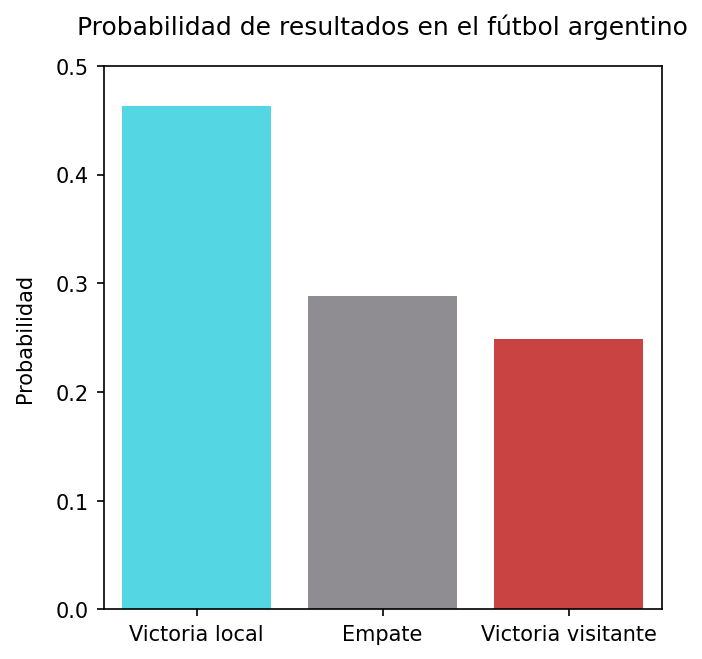

In [ ]:
#Local vs visitante porcentaje de victorias

resultados = resultados_original[ ["date_name", "local_team", "local_result", "visitor_result", "visitor_team"] ].dropna()

victorias_local = len(resultados[ resultados["local_result"] > resultados["visitor_result"] ])
empates = len(resultados[ resultados["local_result"] == resultados["visitor_result"] ])
victorias_visitante = len(resultados[ resultados["local_result"] < resultados["visitor_result"] ])

partidos = len(resultados)

proba_victoria_local = victorias_local / partidos
proba_victoria_visitante = victorias_visitante / partidos
proba_empate = empates / partidos

probas = [proba_victoria_local, proba_empate, proba_victoria_visitante]
casos = ["Victoria local", "Empate", "Victoria visitante"]
df_probas = pd.DataFrame({"Resultado": casos, "Probabilidad": probas})

plt.figure(dpi=150, figsize=(4.8, 4.8))
sns.barplot(data=df_probas, x="Resultado", y="Probabilidad", palette=["#3EEAFA", "#8F8B93", "#E02C2C"])
plt.title("Probabilidad de resultados en el fútbol argentino", pad=15)
plt.xlabel("")
plt.ylabel("Probabilidad", labelpad=10)
plt.ylim(0, 0.5)

Text(0.5, 1.0, 'Distribución de los resultados posibles en el fútbol argentino')

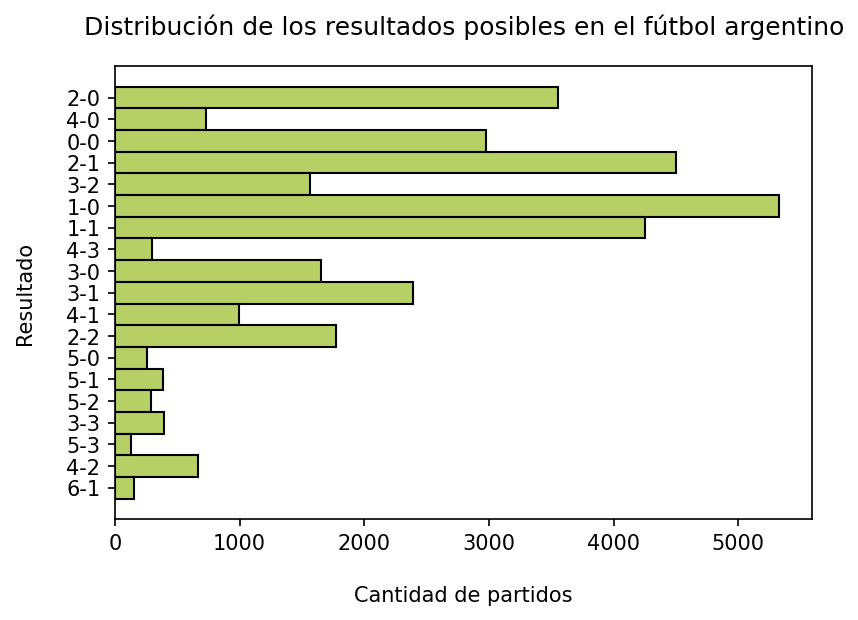

In [ ]:
#Histograma con la distribución de los resultados posibles

def obtener_resultado(local, visitante):
  if local >= visitante:
    return str(local) + "-" + str(visitante)
  else:
    return str(visitante) + "-" + str(local)

resultados["resultado"] = resultados[["local_result", "visitor_result"]].apply(lambda x : obtener_resultado(*x), axis = 1)
resultados = resultados.groupby("resultado").filter(lambda x: len(x) > 100)

plt.figure(dpi=150)
sns.histplot(resultados["resultado"], y=resultados["resultado"], color='#9FC131')
plt.xlabel("Cantidad de partidos", labelpad=15)
plt.ylabel("Resultado", labelpad=15)
plt.title("Distribución de los resultados posibles en el fútbol argentino", pad=15)